# 3. Self-consistent field 

## 3.3 Supplementary notes: multi-electron picture

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34 
q=1.602e-19
I0=q*q/hbar

#Parameters
#U0=0.25
U0=0.025 #For Figure (b)
kT=0.025
mu=0
ep=0.2
g1=0.005 
g2=0.005 
g=g1+g2
alphag=1
alphad=0.5

#Bias
IV=101 
VV=np.linspace(0,1.5,IV)

#Initializing arrays
I1=np.zeros((IV))
I2=np.zeros((IV))

for iV in range(0,IV):
    Vg=0
    Vd=VV[iV];
    mu1=mu
    mu2=mu1-Vd
    UL=-(alphag*Vg)-(alphad*Vd)
    
    #Multielectron method
    f1=1/(1+np.exp((ep+UL+(U0/2)-mu1)/kT))
    f2=1/(1+np.exp((ep+UL+(U0/2)-mu2)/kT))
    f1U=1/(1+np.exp((ep+UL+(U0/2)-mu1)/kT))
    f2U=1/(1+np.exp((ep+UL+(U0/2)-mu2)/kT))
    P1=((g1*f1)+(g2*f2))/(1e-6+(g1*(1-f1))+(g2*(1-f2)))
    P2=P1*((g1*f1U)+(g2*f2U))/(1e-6+(g1*(1-f1U))+(g2*(1-f2U)))
    P0=1/(1+P1+P1+P2)
    P1=P1*P0
    P2=P2*P0
    
    I1[iV]=2*I0*((P0*g1*f1)-(P1*g1*(1-f1))+(P1*g1*f1U)-(P2*g1*(1-f1U)))
    I2[iV]=2*I0*((P0*g2*f2)-(P1*g2*(1-f2))+(P1*g2*f2U)-(P2*g2*(1-f2U)))

###RSCF
#Energy grid
NE=501
E=np.linspace(-1,1,NE)
dE=E[1]-E[0];
D=(g/(2*np.pi))/((E**2)+((g/2)**2)); #Lorentzian Density of states per eV
D=D/(dE*sum(D)); #Normalizing to one

#Initializing arrays
N=np.zeros((IV))
I=np.zeros((IV));

#Bias
for iV in range(0,IV):
    Vg=0; Vd=VV[iV];
    mu1=mu
    mu2=mu1-Vd
    UL=-(alphag*Vg)-(alphad*Vd);
    U=0 # Self-consistent field
    dU=1
    
    while dU>1e-6:
        F1=1/(1+np.exp((E+ep+UL+U-mu1)/kT)) 
        F2=1/(1+np.exp((E+ep+UL+U-mu2)/kT))
        N[iV]=dE*2*sum(D*((F1*g1/g)+(F2*g2/g)))
        Unew=U0*N[iV]
        dU=abs(U-Unew); U=U+0.1*(Unew-U)
    
    I[iV]=dE*2*I0*(sum(D*(F1-F2)))*(g1*g2/g)

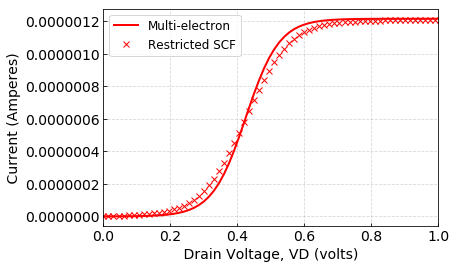

In [2]:
#for figure 3.4.3
plt.figure()

plt.plot(VV,I1,'r',lw=2,label='Multi-electron')
plt.plot(VV,I,'rx',lw=2,label='Restricted SCF')
plt.xlabel(' Drain Voltage, VD (volts) ',fontsize=14)
plt.ylabel(' Current (Amperes) ',fontsize=14)
plt.xlim(0,1)
plt.tick_params(axis='both',which='major',labelsize=14,direction='in')
plt.grid(alpha=0.5, ls='--')
plt.legend(loc=0,fontsize=12)